In [ ]:
import os
import matplotlib.pyplot as plt
from OA_utils.OAPreprocessingScripts import *
from OA_utils.OpenSimScripts import *
from OA_utils.data_utils import interp_segments, ad2float

Create lists of filenames for all raw data

In [2]:
root_dir = '/Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/'
subjects = [f'OA{i}' for i in range(1, 26)]
bad_subjects = ['OA3', 'OA6', 'OA15', 'OA16', 'OA21']
for bs in bad_subjects:
    subjects.remove(bs)
speeds = ['80', '100', '120']
n_trials = 5
subject_trials = {}
for subj in subjects:
    subj_dir = os.path.join(root_dir, subj, 'Walking/Files_W_HJCs/')
    output_dir = os.path.join(root_dir, 'transformed/')
    # Initialize nested dict
    subject_trials[subj] = {
        'static': {
            'input': os.path.join(subj_dir, f'{subj}_walk_static1.trc'),
            'output': os.path.join(output_dir, f'{subj}_walk_static1_transformed.trc')
        },
        'tracking': [],
        'forces': []
    }
    # Populate tracking and force trial lists
    for spd in speeds:
        for i in range(1, n_trials + 1):
            trial_name = f'{subj}_{spd}_{i}'

            tracking_in = os.path.join(subj_dir, f'{trial_name}.trc')
            tracking_out = os.path.join(output_dir, f'{trial_name}_transformed.trc')
            force_in = os.path.join(subj_dir, f'{trial_name}.forces')
            force_out = os.path.join(output_dir, f'{trial_name}_transformed.mot')

            subject_trials[subj]['tracking'].append({'input': tracking_in, 'output': tracking_out})
            subject_trials[subj]['forces'].append({'input': force_in, 'output': force_out})

In [3]:
print(subject_trials['OA1'])

{'static': {'input': '/Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/OA1/Walking/Files_W_HJCs/OA1_walk_static1.trc', 'output': '/Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/transformed/OA1_walk_static1_transformed.trc'}, 'tracking': [{'input': '/Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/OA1/Walking/Files_W_HJCs/OA1_80_1.trc', 'output': '/Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/transformed/OA1_80_1_transformed.trc'}, {'input': '/Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/OA1/Walking/Files_W_HJCs/OA1_80_2.trc', 'output': '/Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/transformed/OA1_80_2_transformed.trc'}, {'input': '/Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/OA1/Walking/Files_W_HJCs/OA1_80_3.trc', 'output': '/Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/transformed/OA1_80_3_transformed.trc'}, {'input': '/Users/briankeller/De

Preprocess all tracking and grf data

In [4]:
all_segs = {}
for subj, data in subject_trials.items():
    process_hjc_trc(input_path=data['static']['input'], 
                    output_path=data['static']['output'], 
                    markers_to_drop=[])
    for trc, forces in zip(data['tracking'], data['forces']):
        trial_segs = preprocess_trc_grf(trc_ip=trc['input'], 
                           trc_op=trc['output'],
                           markers_to_drop=[], 
                           grf_ip=forces['input'], 
                           grf_op=forces['output'])
        all_segs.update(trial_segs)
print(all_segs)

{'OA1_80_1': {'left': [(1.2885, 2.0735)], 'right': [(0.6945, 1.475), (1.886, 2.696)]}, 'OA1_80_2': {'left': [(1.207, 2.011)], 'right': [(0.6065, 1.4145), (1.824, 2.6345)]}, 'OA1_80_3': {'left': [(1.151, 1.9685)], 'right': [(0.543, 1.357), (1.778, 2.577)]}, 'OA1_80_4': {'left': [(1.232, 2.0545)], 'right': [(0.624, 1.433), (1.8555, 2.689)]}, 'OA1_80_5': {'left': [(1.0405, 1.837)], 'right': [(0.4395, 1.2235), (1.652, 2.4615)]}, 'OA1_100_1': {'left': [(0.912, 1.6125)], 'right': [(0.37, 1.072), (1.4565, 2.1605)]}, 'OA1_100_2': {'left': [(1.0515, 1.741)], 'right': [(0.5325, 1.214), (1.5905, 2.278)]}, 'OA1_100_3': {'left': [(0.978, 1.6435)], 'right': [(0.476, 1.1395), (1.502, 2.178)]}, 'OA1_100_4': {'left': [(1.5375, 2.1985)], 'right': [(0.551, 1.1595), (1.0135, 1.698)]}, 'OA1_100_5': {'left': [(0.8995, 1.5655)], 'right': [(0.385, 1.061), (1.418, 2.1145)]}, 'OA1_120_1': {'left': [(0.9025, 1.513)], 'right': [(0.409, 1.0285)]}, 'OA1_120_2': {'left': [(0.347, 0.9285), (0.7965, 1.4055)], 'right':

Scale Models for each subject

In [6]:
subj_masses = [63.5026, 61.68824, 68.0385, 68.0385, 59.87388, 76.65671, 57.15234, 71.66722,
               84.36774, 67.13132, 52.61644, 70.76004, 75.29594, 69.39927, 83.00697, 47.62695,
              61.68824, 84.82133, 74.38876, 83.91415]
root_dir = '/Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/'
for subj, data in subject_trials.items():
    scale_generic(root_dir= root_dir, mass=subj_masses[i], static_pose_filename=data['static']['output'])

[info] Processing subject OA1_scaled...
[info] Step 1: Loading generic model
[info] Updating Model file from 40000 to latest format...
[info] Loaded model RajagopalModifiedGeneric from file /Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/Models/RajagopalModified_generic.osim
[warning] Couldn't find file 'r_pelvis.vtp'.
[warning] Couldn't find file 'l_pelvis.vtp'.
[warning] Couldn't find file 'sacrum.vtp'.
[warning] Couldn't find file 'r_femur.vtp'.
[warning] Couldn't find file 'r_tibia.vtp'.
[warning] Couldn't find file 'r_fibula.vtp'.
[warning] Couldn't find file 'r_patella.vtp'.
[warning] Couldn't find file 'r_talus.vtp'.
[warning] Couldn't find file 'r_foot.vtp'.
[warning] Couldn't find file 'r_bofoot.vtp'.
[warning] Couldn't find file 'l_femur.vtp'.
[warning] Couldn't find file 'l_tibia.vtp'.
[warning] Couldn't find file 'l_fibula.vtp'.
[warning] Couldn't find file 'l_patella.vtp'.
[warning] Couldn't find file 'l_talus.vtp'.
[warning] Couldn't find file 'l_foot.vtp

KeyboardInterrupt: 

Inverse Kinematics for each trial: causes memory overflow when running in notebook

In [ ]:
root_dir = '/Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/'
for subj, data in subject_trials.items():
    model = osim.Model(f'Results/Scaling/{subj}_scaled.osim')
    for trc, in data['tracking']:
        inverse_kinmatics(root_dir= root_dir, tracking_data_filepath=trc['output'], model=model)

[info] Loaded model OA1 from file Results/Scaling/OA1_scaled.osim
[warning] Couldn't find file 'r_patella.vtp'.
[warning] Couldn't find file 'r_talus.vtp'.
[warning] Couldn't find file 'r_foot.vtp'.
[warning] Couldn't find file 'r_bofoot.vtp'.
[warning] Couldn't find file 'l_patella.vtp'.
[warning] Couldn't find file 'l_talus.vtp'.
[warning] Couldn't find file 'l_foot.vtp'.
[warning] Couldn't find file 'l_bofoot.vtp'.
[warning] Couldn't find file 'hat_spine.vtp'.
[warning] Couldn't find file 'hat_jaw.vtp'.
[warning] Couldn't find file 'hat_skull.vtp'.
[warning] Couldn't find file 'hat_ribs_scap.vtp'.
[warning] Couldn't find file 'humerus_rv.vtp'.
[warning] Couldn't find file 'ulna_rv.vtp'.
[warning] Couldn't find file 'radius_rv.vtp'.
[warning] Couldn't find file 'pisiform_rvs.vtp'.
[warning] Couldn't find file 'lunate_rvs.vtp'.
[warning] Couldn't find file 'scaphoid_rvs.vtp'.
[warning] Couldn't find file 'triquetrum_rvs.vtp'.
[warning] Couldn't find file 'hamate_rvs.vtp'.
[warning] Co

Inverse Dynamics for each trial

In [3]:
root_dir = '/Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/'
for subj, data in subject_trials.items():
    model = osim.Model(f'Results/Scaling/{subj}_scaled.osim')
    for trc, forces in zip(data['tracking'], data['forces']):
        inverse_dynamics(root_dir=root_dir, force_data_filepath=forces['output'], tracking_data_filepath=trc['output'], model=model)

[info] Loaded model OA1 from file Results/Scaling/OA1_scaled.osim
[warning] Couldn't find file 'r_patella.vtp'.
[warning] Couldn't find file 'r_talus.vtp'.
[warning] Couldn't find file 'r_foot.vtp'.
[warning] Couldn't find file 'r_bofoot.vtp'.
[warning] Couldn't find file 'l_patella.vtp'.
[warning] Couldn't find file 'l_talus.vtp'.
[warning] Couldn't find file 'l_foot.vtp'.
[warning] Couldn't find file 'l_bofoot.vtp'.
[warning] Couldn't find file 'hat_spine.vtp'.
[warning] Couldn't find file 'hat_jaw.vtp'.
[warning] Couldn't find file 'hat_skull.vtp'.
[warning] Couldn't find file 'hat_ribs_scap.vtp'.
[warning] Couldn't find file 'humerus_rv.vtp'.
[warning] Couldn't find file 'ulna_rv.vtp'.
[warning] Couldn't find file 'radius_rv.vtp'.
[warning] Couldn't find file 'pisiform_rvs.vtp'.
[warning] Couldn't find file 'lunate_rvs.vtp'.
[warning] Couldn't find file 'scaphoid_rvs.vtp'.
[warning] Couldn't find file 'triquetrum_rvs.vtp'.
[warning] Couldn't find file 'hamate_rvs.vtp'.
[warning] Co

Segment data of interest

In [29]:
#initialize arrays to store compiled segments
grf_x_segs = []
grf_y_segs = []
grf_z_segs = []

tibpost_segments = []
tibant_segments = []
edl_segments = []
ehl_segments = []
fdl_segments = []
fhl_segments = []
gaslat_segments = []
gasmed_segments = []
soleus_segments = []
perbrev_segments = []
perlong_segments = []
achilles_segments = []

#loop thru subjects
for subject, subject_segs in all_segs.items():
    grf_path = os.path.join('/Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/transformed/grf_pickles', subject)
    grf_df = pd.read_pickle(grf_path)
    muscle_path = os.path.join(f'/Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/Results/SO/{subject}/results_forces.sto')
    muscle_storage = osim.Storage(muscle_path)

    time = grf_df['time'].values
    muscle_time_col = osim.ArrayDouble()
    tibpost_r_col = osim.ArrayDouble()
    tibant_r_col = osim.ArrayDouble()
    edl_r_col = osim.ArrayDouble()
    ehl_r_col = osim.ArrayDouble()
    fdl_r_col = osim.ArrayDouble()
    fhl_r_col = osim.ArrayDouble()
    gaslat_r_col = osim.ArrayDouble()
    gasmed_r_col = osim.ArrayDouble()
    soleus_r_col = osim.ArrayDouble()
    perbrev_r_col = osim.ArrayDouble()
    perlong_r_col = osim.ArrayDouble()
        
    tibpost_l_col = osim.ArrayDouble()
    tibant_l_col = osim.ArrayDouble()
    edl_l_col = osim.ArrayDouble()
    ehl_l_col = osim.ArrayDouble()
    fdl_l_col = osim.ArrayDouble()
    fhl_l_col = osim.ArrayDouble()
    gaslat_l_col = osim.ArrayDouble()
    gasmed_l_col = osim.ArrayDouble()
    soleus_l_col = osim.ArrayDouble()
    perbrev_l_col = osim.ArrayDouble()
    perlong_l_col = osim.ArrayDouble()

    muscle_storage.getTimeColumn(muscle_time_col)
    muscle_storage.getDataColumn('tibpost_r', tibpost_r_col)
    muscle_storage.getDataColumn('tibant_r', tibant_r_col)
    muscle_storage.getDataColumn('edl_r', edl_r_col)
    muscle_storage.getDataColumn('ehl_r', ehl_r_col)
    muscle_storage.getDataColumn('fdl_r', fdl_r_col)
    muscle_storage.getDataColumn('fhl_r', fhl_r_col)
    muscle_storage.getDataColumn('gaslat_r', gaslat_r_col)
    muscle_storage.getDataColumn('gasmed_r', gasmed_r_col)
    muscle_storage.getDataColumn('soleus_r', soleus_r_col)
    muscle_storage.getDataColumn('perbrev_r', perbrev_r_col)
    muscle_storage.getDataColumn('perlong_r', perlong_r_col)
        
    muscle_storage.getDataColumn('tibpost_l', tibpost_l_col)
    muscle_storage.getDataColumn('tibant_l', tibant_l_col)
    muscle_storage.getDataColumn('edl_l', edl_l_col)
    muscle_storage.getDataColumn('ehl_l', ehl_l_col)
    muscle_storage.getDataColumn('fdl_l', fdl_l_col)
    muscle_storage.getDataColumn('fhl_l', fhl_l_col)
    muscle_storage.getDataColumn('gaslat_l', gaslat_l_col)
    muscle_storage.getDataColumn('gasmed_l', gasmed_l_col)
    muscle_storage.getDataColumn('soleus_l', soleus_l_col)
    muscle_storage.getDataColumn('perbrev_l', perbrev_l_col)
    muscle_storage.getDataColumn('perlong_l', perlong_l_col)
    muscle_time = ad2float(muscle_time_col)
    tibpost_r = ad2float(tibpost_r_col)
    tibant_r = ad2float(tibant_r_col)
    edl_r = ad2float(edl_r_col)
    ehl_r = ad2float(ehl_r_col)
    fdl_r = ad2float(fdl_r_col)
    fhl_r = ad2float(fhl_r_col)
    gaslat_r = ad2float(gaslat_r_col)
    gasmed_r = ad2float(gasmed_r_col)
    soleus_r = ad2float(soleus_r_col)
    perbrev_r = ad2float(perbrev_r_col)
    perlong_r = ad2float(perlong_r_col)
        
    tibpost_l = ad2float(tibpost_l_col)
    tibant_l = ad2float(tibant_l_col)
    edl_l = ad2float(edl_l_col)
    ehl_l = ad2float(ehl_l_col)
    fdl_l = ad2float(fdl_l_col)
    fhl_l = ad2float(fhl_l_col)
    gaslat_l = ad2float(gaslat_l_col)
    gasmed_l = ad2float(gasmed_l_col)
    soleus_l = ad2float(soleus_l_col)
    perbrev_l = ad2float(perbrev_l_col)
    perlong_l = ad2float(perlong_l_col)

    for side, seg_list in subject_segs.items():
        for (s, e) in seg_list:
            grf_mask = (time >= s) & (time <= e)
            muscle_mask = (muscle_time >= s) & (muscle_time <= e)
            if not muscle_mask.any() or not muscle_mask.any():
                continue
            if side == 'right':
                seg_x = grf_df.loc[grf_mask, 'ground_force_vx']
                seg_y = grf_df.loc[grf_mask, 'ground_force_vy']
                seg_z = grf_df.loc[grf_mask, 'ground_force_vz']
                seg_tibpost = tibpost_r[muscle_mask]
                seg_tibant = tibant_r[muscle_mask]
                seg_edl = edl_r[muscle_mask]
                seg_ehl = ehl_r[muscle_mask]
                seg_fdl = fdl_r[muscle_mask]
                seg_fhl = fhl_r[muscle_mask]
                seg_gaslat = gaslat_r[muscle_mask]
                seg_gasmed = gasmed_r[muscle_mask]
                seg_soleus = soleus_r[muscle_mask]
                seg_perbrev = perbrev_r[muscle_mask]
                seg_perlong = perlong_r[muscle_mask]
                seg_achilles = np.sum(np.array([seg_gaslat, seg_gasmed, seg_soleus]), axis=0)
            else:
                seg_x = grf_df.loc[grf_mask, '1_ground_force_vx']
                seg_y = grf_df.loc[grf_mask, '1_ground_force_vy']
                seg_z = grf_df.loc[grf_mask, '1_ground_force_vz']
                seg_tibpost = tibpost_l[muscle_mask]
                seg_tibant = tibant_l[muscle_mask]
                seg_edl = edl_l[muscle_mask]
                seg_ehl = ehl_l[muscle_mask]
                seg_fdl = fdl_l[muscle_mask]
                seg_fhl = fhl_l[muscle_mask]
                seg_gaslat = gaslat_l[muscle_mask]
                seg_gasmed = gasmed_l[muscle_mask]
                seg_soleus = soleus_l[muscle_mask]
                seg_perbrev = perbrev_l[muscle_mask]
                seg_perlong = perlong_l[muscle_mask]
                seg_achilles = np.sum(np.array([seg_gaslat, seg_gasmed, seg_soleus]), axis=0)

            grf_x_segs.append(seg_x)
            grf_y_segs.append(seg_y)
            grf_z_segs.append(seg_z)

            tibpost_segments.append(seg_tibpost)
            tibant_segments.append(seg_tibant)
            edl_segments.append(seg_edl)
            ehl_segments.append(seg_ehl)
            fdl_segments.append(seg_fdl)
            fhl_segments.append(seg_fhl)
            gaslat_segments.append(seg_gaslat)
            gasmed_segments.append(seg_gasmed)
            soleus_segments.append(seg_soleus)
            perbrev_segments.append(seg_perbrev)
            perlong_segments.append(seg_perlong)
            achilles_segments.append(seg_achilles)

num_x_segments = len(grf_x_segs)
max_x_seg_len = max([len(seg) for seg in grf_x_segs])
min_x_seg_len = min([len(seg) for seg in grf_x_segs])

num_y_segments = len(grf_y_segs)
max_y_seg_len = max([len(seg) for seg in grf_y_segs])
min_y_seg_len = min([len(seg) for seg in grf_y_segs])

num_z_segments = len(grf_z_segs)
max_z_seg_len = max([len(seg) for seg in grf_z_segs])
min_z_seg_len = min([len(seg) for seg in grf_z_segs])

print(f"Number of segments (x, y, z): {num_x_segments}, {num_y_segments}, {num_z_segments}")
print(f"Max segment length (x, y, z): {max_x_seg_len}, {max_y_seg_len}, {max_z_seg_len}")
print(f"Min segment length (x, y, z): {min_x_seg_len}, {min_y_seg_len}, {min_z_seg_len}")


[info] Storage: read data file = /Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/Results/SO/OA1_80_1/results_forces.sto (nr=291 nc=118)
[info] Storage: read data file = /Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/Results/SO/OA1_80_2/results_forces.sto (nr=286 nc=118)
[info] Storage: read data file = /Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/Results/SO/OA1_80_3/results_forces.sto (nr=286 nc=118)
[info] Storage: read data file = /Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/Results/SO/OA1_80_4/results_forces.sto (nr=291 nc=118)
[info] Storage: read data file = /Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/Results/SO/OA1_80_5/results_forces.sto (nr=273 nc=118)
[info] Storage: read data file = /Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/Results/SO/OA1_100_1/results_forces.sto (nr=225 nc=118)
[info] Storage: read data file = /Users/briankeller/Desktop/GRFMuscleModel/Old_Yo

Plot Segmented Data

Min segment index: 618
954     11.14
955     12.54
956     16.74
957     19.53
958     20.90
        ...  
1952     8.30
1953     6.91
1954     5.53
1955     6.93
1956     0.00
Name: ground_force_vy, Length: 1003, dtype: float64


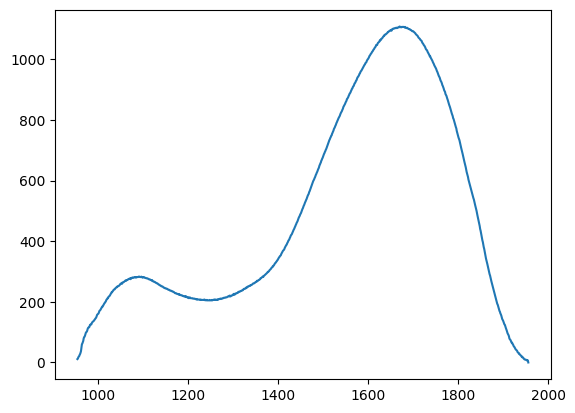

In [7]:
min_seg_idx = np.argmin([len(seg) for seg in grf_y_segs])
min_seg = grf_y_segs[min_seg_idx]
print(f"Min segment index: {min_seg_idx}")
plt.plot(min_seg)

print(min_seg)

In [8]:
n_interp_points = 100
grf_y_resampled, time_resampled = interp_segments(grf_y_segs, n_interp_points)

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 [Text(0, -200.0, '−200'),
  Text(0, 0.0, '0'),
  Text(0, 200.0, '200'),
  Text(0, 400.0, '400'),
  Text(0, 600.0, '600'),
  Text(0, 800.0, '800'),
  Text(0, 1000.0, '1000'),
  Text(0, 1200.0, '1200'),
  Text(0, 1400.0, '1400')])

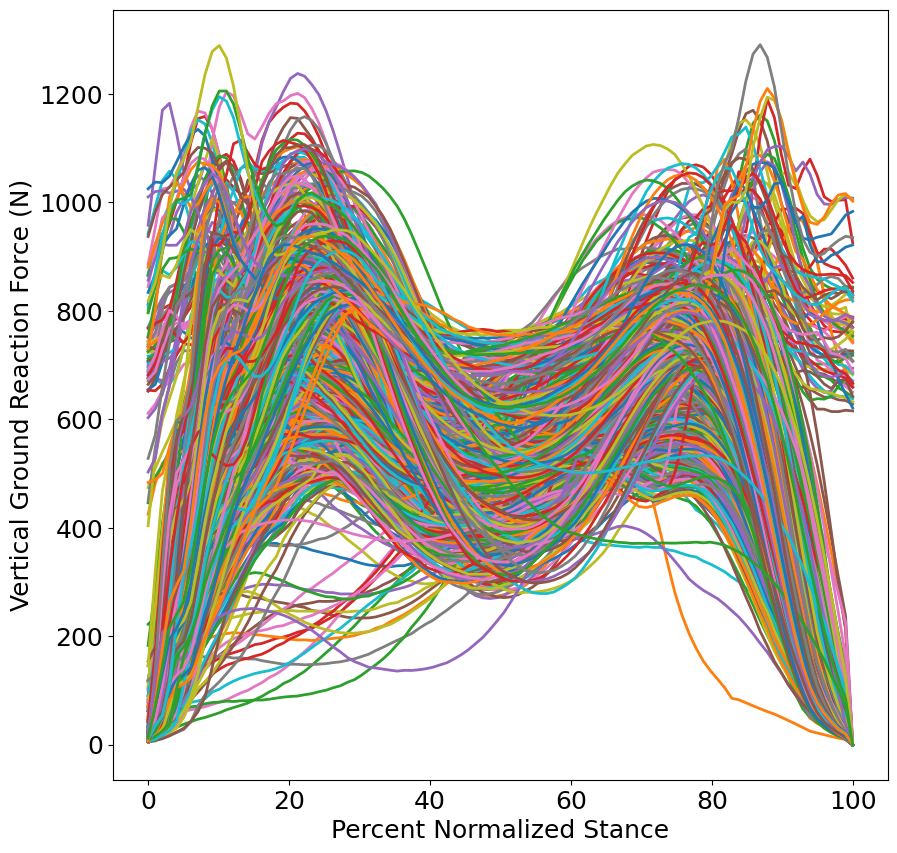

In [9]:
figure = plt.figure(figsize=(10, 10))

num_grf_segments = len(grf_y_resampled)

for i in range(num_grf_segments):
    plt.plot(time_resampled[i]*100, grf_y_resampled[i], linewidth=2)

plt.ylabel("Vertical Ground Reaction Force (N)", fontsize=18)
plt.xlabel("Percent Normalized Stance", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# plt.xlim([0, 1])
# plt.ylim([0, 1200])

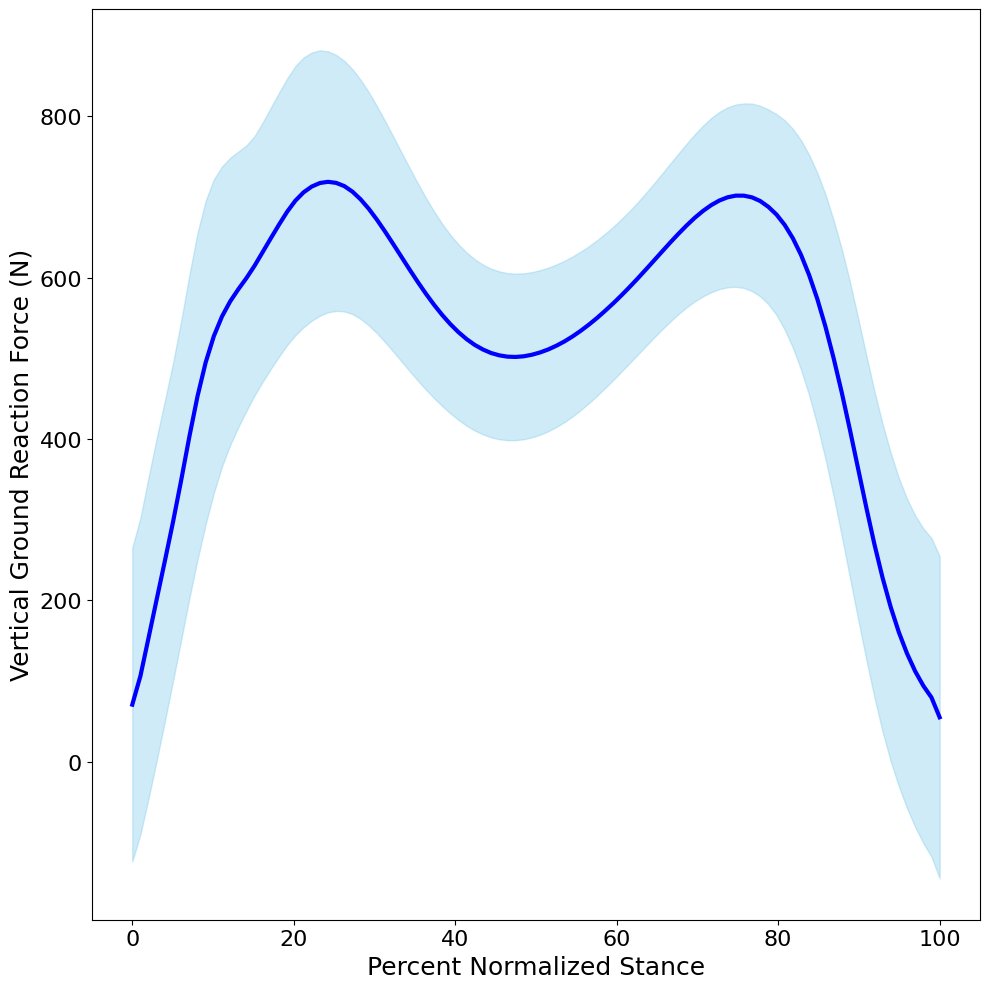

In [10]:
# Convert to array (shape: n_trials x timepoints)
grf_array = np.array(grf_y_resampled)         # shape: (N, T)
time = time_resampled[0] * 100                # assumed to be shared across all trials

# Compute mean and std
mean_grf = np.mean(grf_array, axis=0)
std_grf = np.std(grf_array, axis=0)

# Plot
plt.figure(figsize=(10, 10))

# Shaded region: mean ± 1 std
plt.fill_between(time, mean_grf - std_grf, mean_grf + std_grf,
                 color='skyblue', alpha=0.4, label='±1 SD')

# Mean curve
plt.plot(time, mean_grf, color='blue', linewidth=3, label='Mean GRF')

# Labels and styling
plt.ylabel("Vertical Ground Reaction Force (N)", fontsize=18)
plt.xlabel("Percent Normalized Stance", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# plt.grid(True, alpha=0.3)
# plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

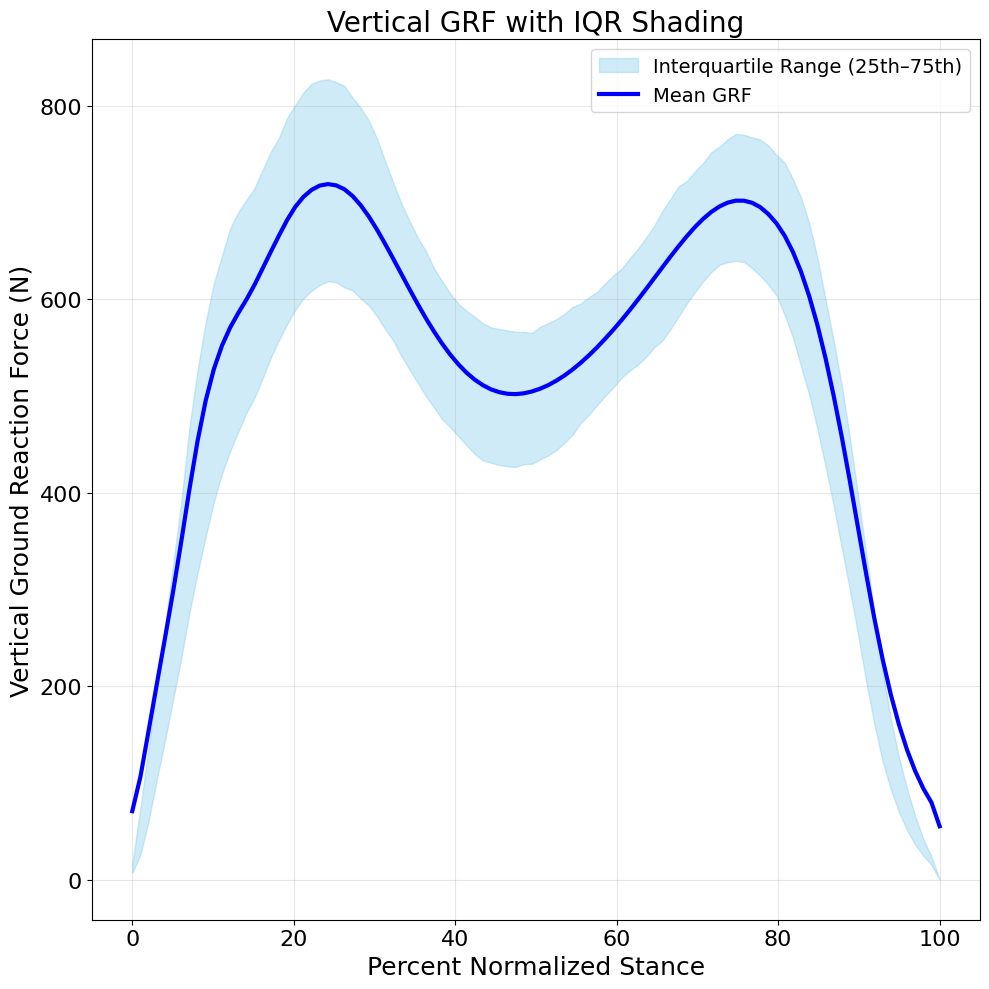

In [11]:
# Stack into array: shape (n_trials, n_timepoints)
grf_array = np.array(grf_y_resampled)
time = time_resampled[0] * 100  # Normalize to percent stance

# Compute mean and IQR
mean_grf = np.mean(grf_array, axis=0)
q1 = np.percentile(grf_array, 25, axis=0)
q3 = np.percentile(grf_array, 75, axis=0)

# Plot
plt.figure(figsize=(10, 10))

# IQR shading
plt.fill_between(time, q1, q3, color='skyblue', alpha=0.4, label='Interquartile Range (25th–75th)')

# Mean line
plt.plot(time, mean_grf, color='blue', linewidth=3, label='Mean GRF')

# Labels and formatting
plt.ylabel("Vertical Ground Reaction Force (N)", fontsize=18)
plt.xlabel("Percent Normalized Stance", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Vertical GRF with IQR Shading", fontsize=20)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

In [12]:
grf_x_resampled, time_resampled = interp_segments(grf_x_segs, n_interp_points)

(array([-400., -300., -200., -100.,    0.,  100.,  200.,  300.,  400.]),
 [Text(0, -400.0, '−400'),
  Text(0, -300.0, '−300'),
  Text(0, -200.0, '−200'),
  Text(0, -100.0, '−100'),
  Text(0, 0.0, '0'),
  Text(0, 100.0, '100'),
  Text(0, 200.0, '200'),
  Text(0, 300.0, '300'),
  Text(0, 400.0, '400')])

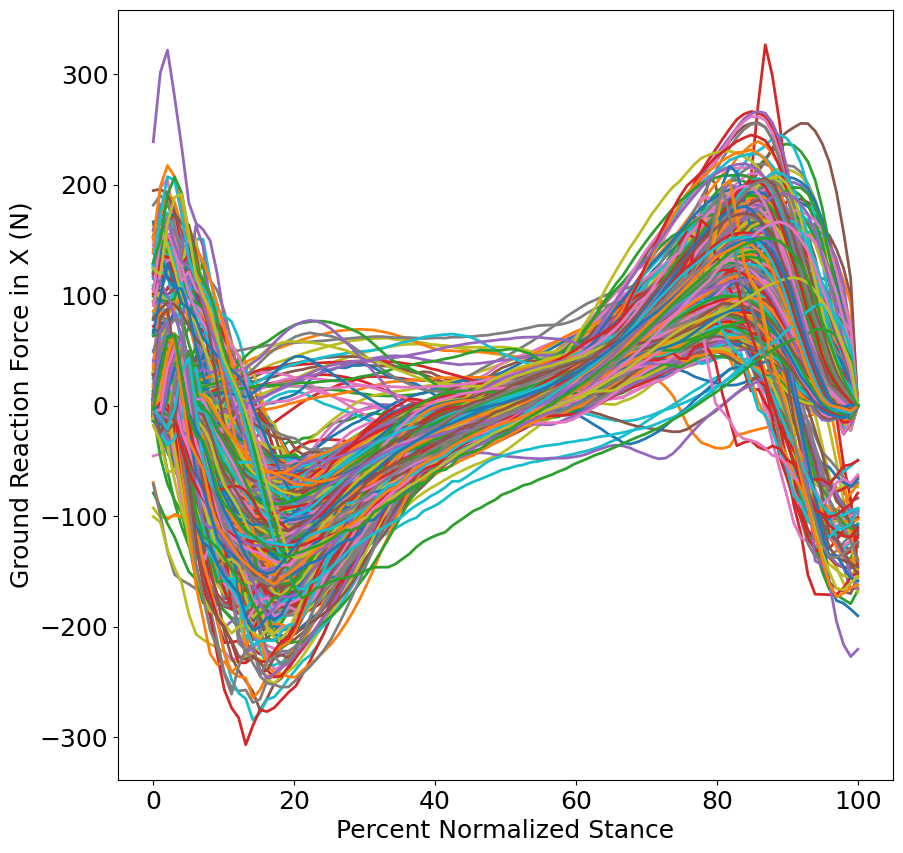

In [13]:
figure = plt.figure(figsize=(10, 10))

num_grf_segments = len(grf_x_resampled)

for i in range(num_grf_segments):
    plt.plot(time_resampled[i]*100, grf_x_resampled[i], linewidth=2)

plt.ylabel("Ground Reaction Force in X (N)", fontsize=18)
plt.xlabel("Percent Normalized Stance", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# plt.xlim([0, 1])
# plt.ylim([0, 1200])

In [14]:
grf_z_resampled, time_resampled = interp_segments(grf_z_segs, n_interp_points)

(array([-150., -100.,  -50.,    0.,   50.,  100.,  150.]),
 [Text(0, -150.0, '−150'),
  Text(0, -100.0, '−100'),
  Text(0, -50.0, '−50'),
  Text(0, 0.0, '0'),
  Text(0, 50.0, '50'),
  Text(0, 100.0, '100'),
  Text(0, 150.0, '150')])

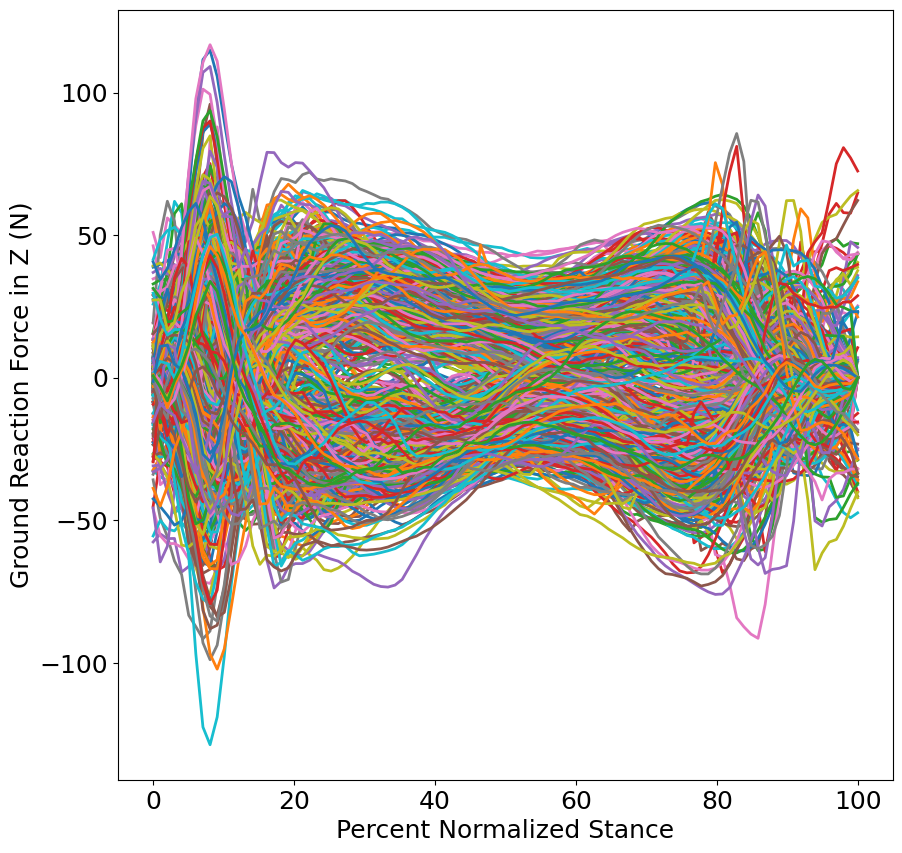

In [15]:
figure = plt.figure(figsize=(10, 10))

num_grf_segments = len(grf_z_resampled)

for i in range(num_grf_segments):
    plt.plot(time_resampled[i]*100, grf_z_resampled[i], linewidth=2)

plt.ylabel("Ground Reaction Force in Z (N)", fontsize=18)
plt.xlabel("Percent Normalized Stance", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# plt.xlim([0, 1])
# plt.ylim([0, 1200])

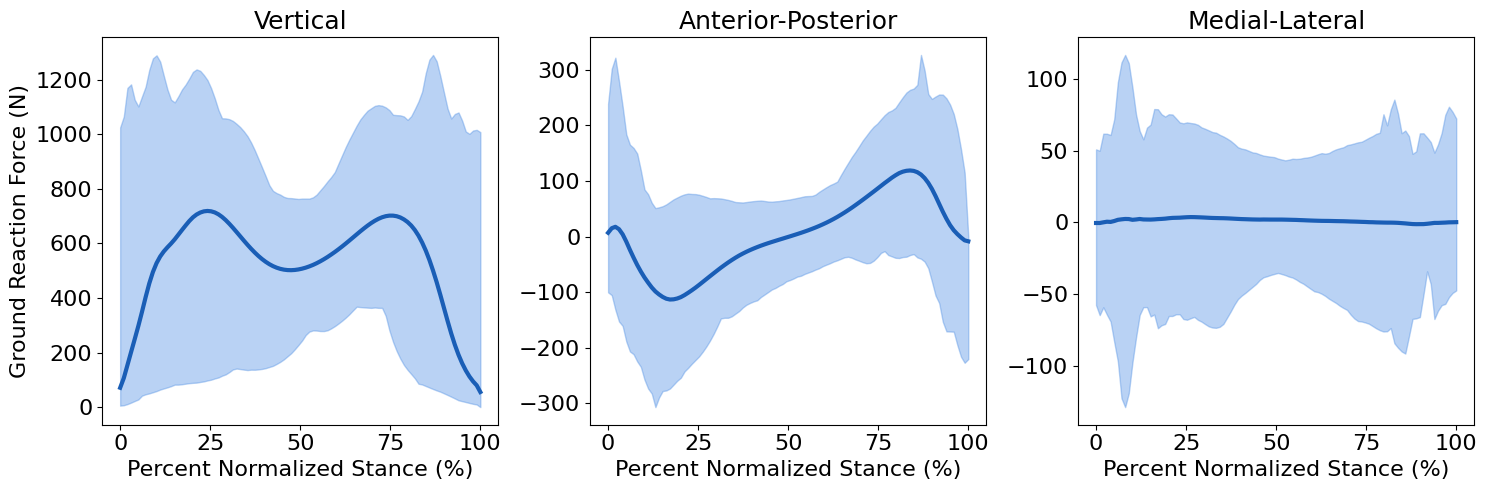

In [16]:
# Stack into arrays
grf_y = np.array(grf_y_resampled)
grf_x = np.array(grf_x_resampled)
grf_z = np.array(grf_z_resampled)
time = time_resampled[0] * 100  # percent stance

# Set up 3-column subplot
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True)

# Define GRF components
components = [
    ("Vertical", grf_y),
    ("Anterior-Posterior", grf_x),
    ("Medial-Lateral", grf_z)
]

colors = {
    'fill': '#5190E4',
    'line': '#1A5EB6'
}

for ax, (label, grf_array) in zip(axes, components):
    mean_grf = np.mean(grf_array, axis=0)
    min_grf = np.min(grf_array, axis=0)
    max_grf = np.max(grf_array, axis=0)

    # Shaded area (min-max)
    ax.fill_between(time, min_grf, max_grf, color=colors['fill'], alpha=0.4, label='Min–Max Range')

    # Mean line
    ax.plot(time, mean_grf, color=colors['line'], linewidth=3, label='Mean GRF')

    ax.set_title(f"{label}", fontsize=18)
    ax.set_xlabel("Percent Normalized Stance (%)", fontsize=16)
    ax.tick_params(axis='both', labelsize=16)
    # ax.grid(True, alpha=0.3)

axes[0].set_ylabel("Ground Reaction Force (N)", fontsize=16)
# axes[0].legend(fontsize=12)

plt.tight_layout()
plt.show()

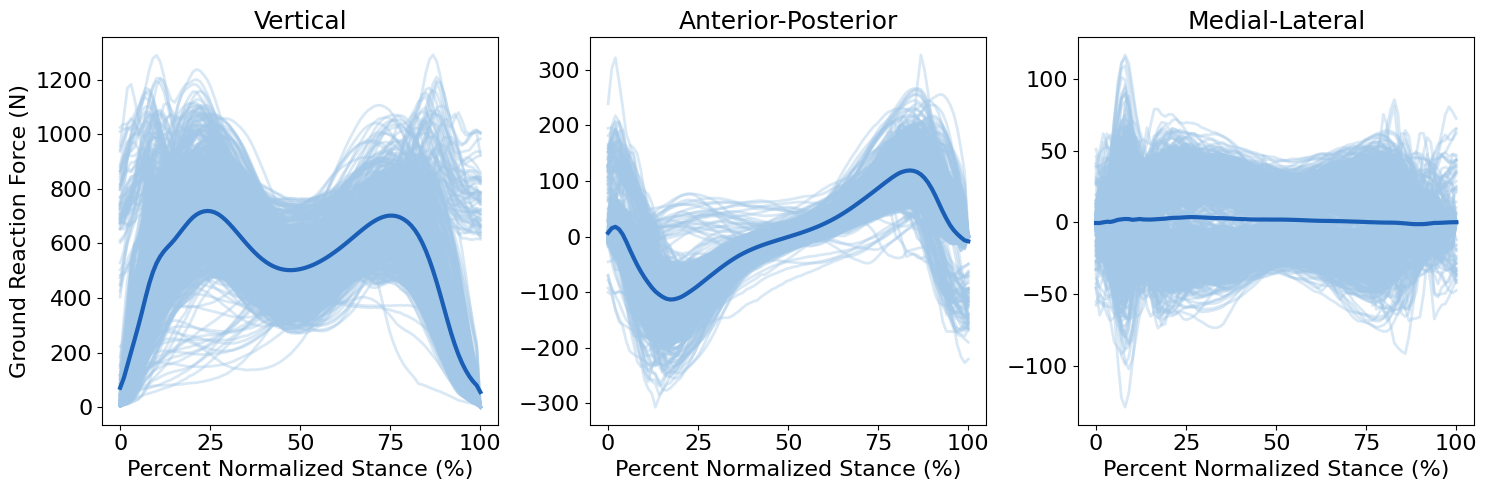

In [17]:
# Stack into arrays
grf_y = np.array(grf_y_resampled)
grf_x = np.array(grf_x_resampled)
grf_z = np.array(grf_z_resampled)
time = time_resampled[0] * 100  # percent stance

# Set up 3-column subplot
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True)

# Define GRF components
components = [
    ("Vertical", grf_y),
    ("Anterior-Posterior", grf_x),
    ("Medial-Lateral", grf_z)
]

colors = {
    'fill': '#5190E4',
    'line': '#1A5EB6'
}

for ax, (label, grf_array) in zip(axes, components):
    mean_grf = np.mean(grf_array, axis=0)
    
    for i in range(num_grf_segments):
        ax.plot(time, grf_array[i], linewidth=2, color="#A2C7E7", alpha=0.4)

    # Mean line
    ax.plot(time, mean_grf, color=colors['line'], linewidth=3, label='Mean GRF')

    ax.set_title(f"{label}", fontsize=18)
    ax.set_xlabel("Percent Normalized Stance (%)", fontsize=16)
    ax.tick_params(axis='both', labelsize=16)
    # ax.grid(True, alpha=0.3)

axes[0].set_ylabel("Ground Reaction Force (N)", fontsize=16)
# axes[0].legend(fontsize=12)

plt.tight_layout()
plt.show()

In [30]:
tibpost_resampled, time_resampled = interp_segments(tibpost_segments, n_interp_points)
tibant_resampled, time_resampled = interp_segments(tibant_segments, n_interp_points)
edl_resampled, time_resampled = interp_segments(edl_segments, n_interp_points)
ehl_resampled, time_resampled = interp_segments(ehl_segments, n_interp_points)
fdl_resampled, time_resampled = interp_segments(fdl_segments, n_interp_points)
fhl_resampled, time_resampled = interp_segments(fhl_segments, n_interp_points)
gaslat_resampled, time_resampled = interp_segments(gaslat_segments, n_interp_points)
gasmed_resampled, time_resampled = interp_segments(gasmed_segments, n_interp_points)
soleus_resampled, time_resampled = interp_segments(soleus_segments, n_interp_points)
perbrev_resampled, time_resampled = interp_segments(perbrev_segments, n_interp_points)
perlong_resampled, time_resampled = interp_segments(perlong_segments, n_interp_points)

achilles_resampled, time_resampled = interp_segments(achilles_segments, n_interp_points)


(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 [Text(0, -2000.0, '−2000'),
  Text(0, 0.0, '0'),
  Text(0, 2000.0, '2000'),
  Text(0, 4000.0, '4000'),
  Text(0, 6000.0, '6000'),
  Text(0, 8000.0, '8000'),
  Text(0, 10000.0, '10000'),
  Text(0, 12000.0, '12000')])

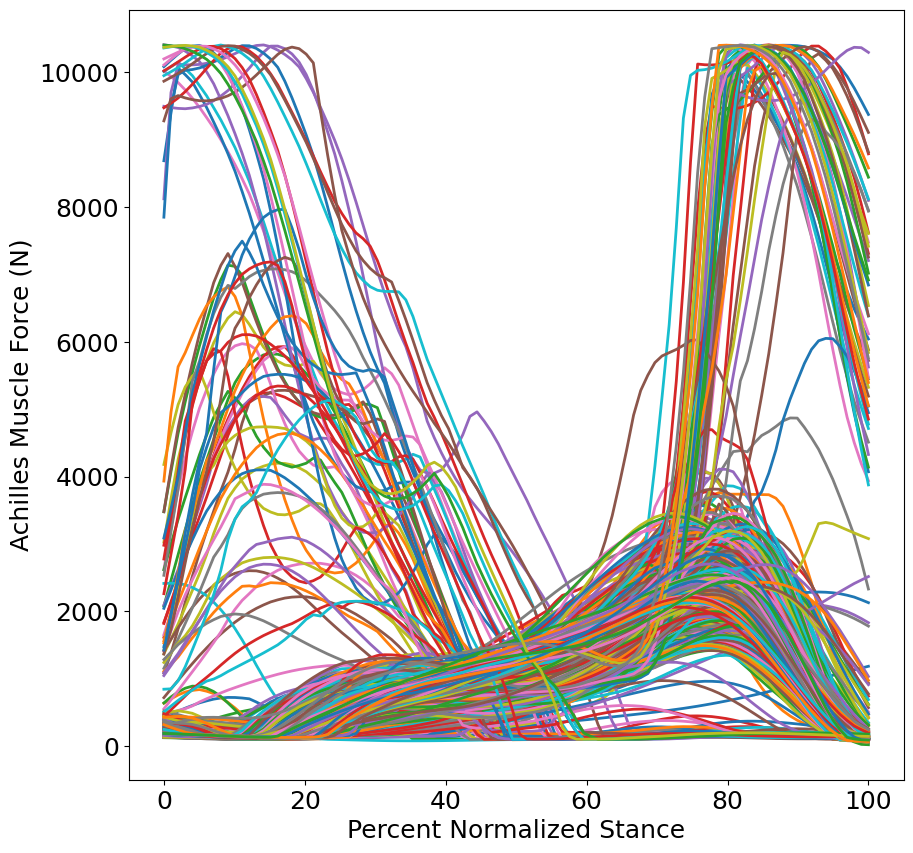

In [31]:
figure = plt.figure(figsize=(10, 10))

num_achilles_segments = len(achilles_resampled)

for i in range(num_achilles_segments):
    plt.plot(time_resampled[i]*100, achilles_resampled[i], linewidth=2)

plt.ylabel("Achilles Muscle Force (N)", fontsize=18)
plt.xlabel("Percent Normalized Stance", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# plt.xlim([0, 1])
# plt.ylim([0, 5000])

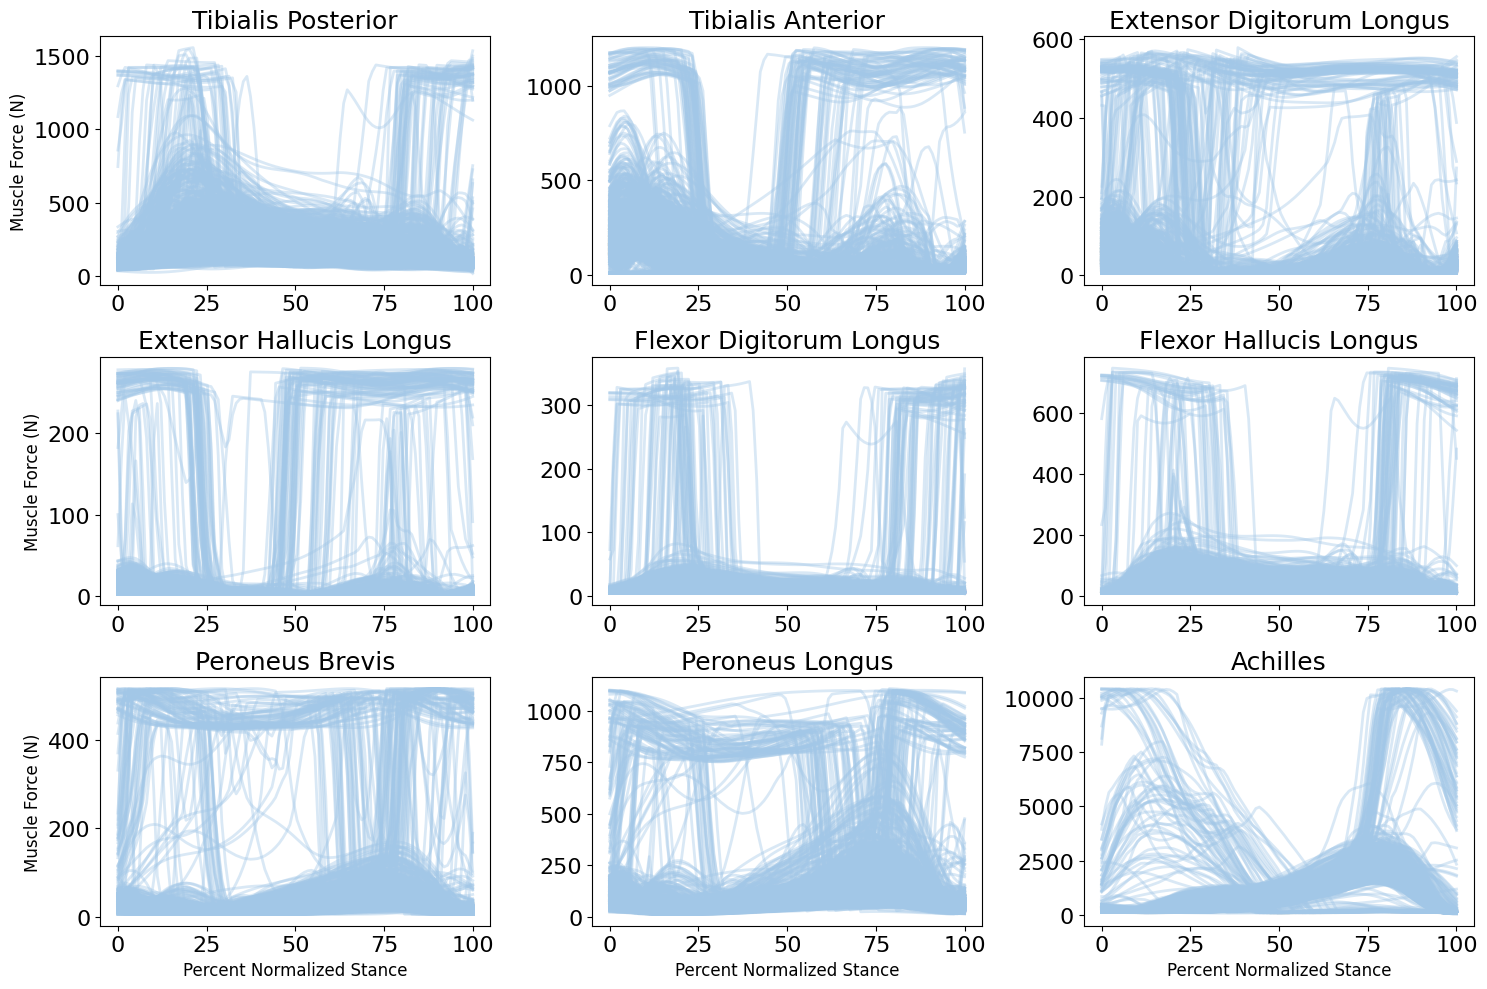

In [32]:
muscle_titles = ['Tibialis Posterior', 'Tibialis Anterior', 'Extensor Digitorum Longus', 'Extensor Hallucis Longus', 
                 'Flexor Digitorum Longus', 'Flexor Hallucis Longus', 'Peroneus Brevis', 'Peroneus Longus', 'Achilles']

perc_stance = np.linspace(0, 100, 100)

muscle_forces = [tibpost_resampled, tibant_resampled, edl_resampled, ehl_resampled, fdl_resampled, fhl_resampled,
                 perbrev_resampled, perlong_resampled, achilles_resampled]

fig, axes = plt.subplots(3, 3, figsize=(15, 10))  # Create subplots for 9 muscles
axes = axes.flatten()

for i, ax in enumerate(axes):
    for j in range(num_achilles_segments):
        ax.plot(time_resampled[j]*100, muscle_forces[i][j], linewidth=2, color="#A2C7E7", alpha=0.4)
    
    mean_force = ()
    
    if i >= 6:
        ax.set_xlabel('Percent Normalized Stance', fontsize=12)
        
    if i % 3 == 0:
        ax.set_ylabel('Muscle Force (N)', fontsize=12)
        
    ax.set_title(muscle_titles[i], fontsize=18)
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)

plt.tight_layout()
plt.show()